In [1]:
import pandas as pd
import sklearn
print("✅ Kernel is working! All good now.")


✅ Kernel is working! All good now.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Corrected path
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_binary']  = df['OverTime'].map({'Yes': 1, 'No': 0})

X = df[['Age', 'TotalWorkingYears', 'OverTime_binary', 'JobSatisfaction', 'MonthlyIncome']]
y = df['Attrition_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step 1: Load your data
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')  # Adjust path if needed

# Step 2: Create binary columns
df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_binary'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Step 3: Define features and target
X = df[['Age', 'TotalWorkingYears', 'OverTime_binary', 'JobSatisfaction', 'MonthlyIncome']]
y = df['Attrition_binary']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Step 7: Train & predict
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f"{name} - First 5 predicted probabilities:\n", y_pred_proba[:5])


/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul

Logistic Regression - First 5 predicted probabilities:
 [0.27187091 0.06370388 0.06590697 0.03390698 0.38543254]
Random Forest - First 5 predicted probabilities:
 [0.86 0.11 0.04 0.02 0.37]
Gradient Boosting - First 5 predicted probabilities:
 [0.54694407 0.05963374 0.02858665 0.03956681 0.18572136]


/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/alexalxndrpgmail.com/Projects/hr_analytics/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul

Logistic Regression AUC: 0.769
Random Forest AUC: 0.715
Gradient Boosting AUC: 0.759


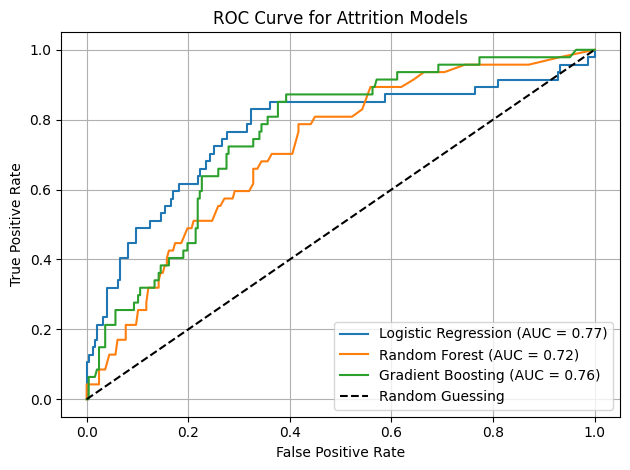

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')  # Adjust path if needed

df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_binary'] = df['OverTime'].map({'Yes': 1, 'No': 0})

X = df[['Age', 'TotalWorkingYears', 'OverTime_binary', 'JobSatisfaction', 'MonthlyIncome']]
y = df['Attrition_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{name} AUC: {auc:.3f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Finalize ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Attrition Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# 🧪 Attrition Model Evaluation – ROC/AUC Summary

## 📘 What Is ROC and AUC?

### 🎯 ROC Curve (Receiver Operating Characteristic)
- It's a graph that shows how good a classification model is at separating two classes (e.g., "will leave" vs "will stay").
- **X-axis (False Positive Rate)**: how often the model thinks someone will leave when they won’t.
- **Y-axis (True Positive Rate)**: how often the model correctly detects someone who *will* leave.
- The **closer the curve is to the top-left corner**, the better the model performs.

### 📐 AUC (Area Under the Curve)
- AUC is a number between **0.5 and 1.0** that summarizes the ROC curve.
- **1.0** = perfect separation.
- **0.5** = random guessing (like flipping a coin).
- **Higher AUC = better model**.

---

## 📊 ROC Curve You Generated

You evaluated 3 models:

| Model                | AUC Score |
|---------------------|-----------|
| Logistic Regression | **0.77**  |
| Gradient Boosting   | **0.76**  |
| Random Forest       | **0.72**  |

### 🚦 What This Means:
- All three models are **clearly better than random guessing** (dotted diagonal line).
- **Logistic Regression** performs slightly better than the others in this case.
- **Gradient Boosting** is also strong and very close.
- **Random Forest** still performs well, but a little behind the top two.

---

## 🧠 Visual Breakdown of the Chart:

- 📈 **Blue Line**: Logistic Regression – solid performance (AUC = 0.77).
- 📈 **Green Line**: Gradient Boosting – close second (AUC = 0.76).
- 📈 **Orange Line**: Random Forest – performs slightly less well (AUC = 0.72).
- ⚫ **Black Dotted Line**: What it would look like if your model was just guessing randomly (AUC = 0.5).

---

## ✅ Conclusion:

- All your models are doing a decent job of predicting attrition.
- Logistic Regression is the most effective here, followed closely by Gradient Boosting.
- These models can now be used for deeper analysis, feature importance, or deployment steps.
